In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


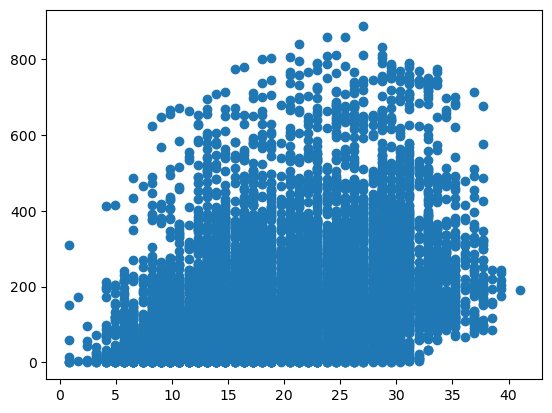

In [4]:
plt.scatter(bikes['temp'],bikes['registered'])

In [5]:
x = bikes['temp']
y = bikes['casual']

In [6]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:40:06   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [7]:
"y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday"

'y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday'

In [8]:
53.1426 + (2.9255*9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [9]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])

In [11]:
pred_vals

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [12]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [13]:
res

,y_hat,casual
0,14.175362,3
1,12.612922,8
2,12.612922,5
3,19.194189,3
4,19.194189,0
...,...,...
10881,20.856745,7
10882,12.602536,10
10883,6.857740,4
10884,6.857740,12


In [14]:
res['error'] = res['y_hat'] - res['casual']

In [15]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


In [16]:
res['sq_error'] = res['error']**2

In [17]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

In [18]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

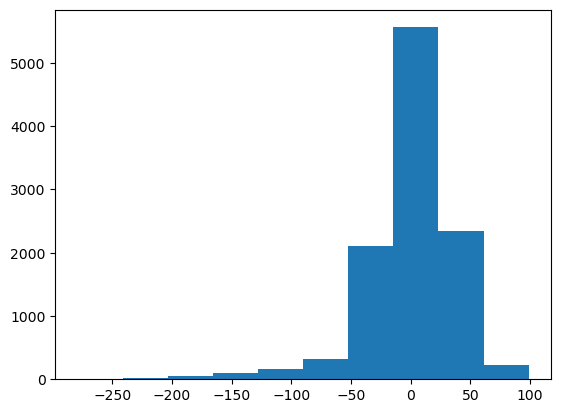

In [19]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

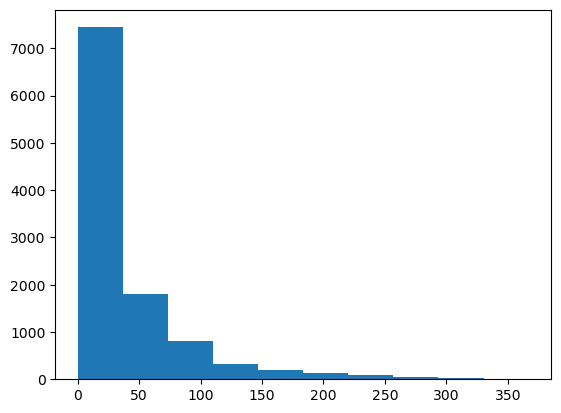

In [20]:
plt.hist(bikes['casual'])

In [21]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


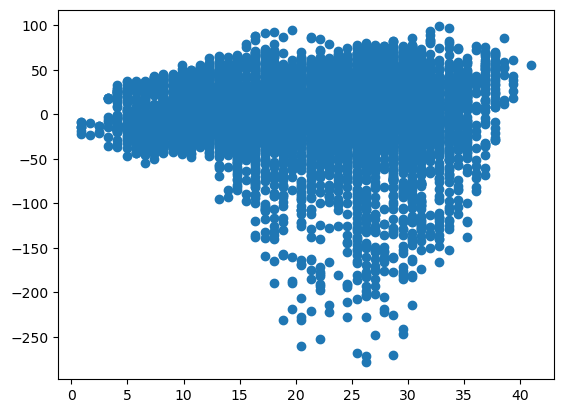

In [22]:
plt.scatter(bikes['temp'],res['error'])

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [25]:
bikes = pd.read_csv('/Users/jiawenli/Desktop/MBAN_6110T/Class_6/bikes_sharing.csv')

In [26]:
categorical_features = ['workingday','season', 'weather']
numerical_features = ['temp','humidity', 'windspeed']
target = 'casual'

In [27]:
bikes[['workingday','season','temp','humidity']]

,workingday,season,temp,humidity
0,0,1,9.84,81
1,0,1,9.02,80
2,0,1,9.02,80
3,0,1,9.84,75
4,0,1,9.84,75
...,...,...,...,...
10881,1,4,15.58,50
10882,1,4,14.76,57
10883,1,4,13.94,61
10884,1,4,13.94,61


In [28]:
bikes[categorical_features + numerical_features]

,workingday,season,weather,temp,humidity,windspeed
0,0,1,1,9.84,81,0.0000
1,0,1,1,9.02,80,0.0000
2,0,1,1,9.02,80,0.0000
3,0,1,1,9.84,75,0.0000
4,0,1,1,9.84,75,0.0000
...,...,...,...,...,...,...
10881,1,4,1,15.58,50,26.0027
10882,1,4,1,14.76,57,15.0013
10883,1,4,1,13.94,61,15.0013
10884,1,4,1,13.94,61,6.0032


In [29]:
X_train, X_test, y_train, y_test = train_test_split(bikes[categorical_features + numerical_features],bikes[target], test_size=0.3,random_state=1234)

In [30]:
X_train

,workingday,season,weather,temp,humidity,windspeed
10261,0,4,2,22.14,77,15.0013
5728,1,1,1,9.84,41,11.0014
3373,1,3,1,32.80,41,26.0027
9533,1,4,2,24.60,43,7.0015
8549,1,3,1,38.54,29,16.9979
...,...,...,...,...,...,...
664,1,1,1,4.92,39,0.0000
7540,0,2,1,27.88,54,16.9979
7221,1,2,2,16.40,82,7.0015
1318,0,1,1,18.04,33,19.0012


In [31]:
X_test

,workingday,season,weather,temp,humidity,windspeed
3730,1,3,2,22.14,81,27.9993
3675,0,3,1,27.06,83,8.9981
9557,1,4,3,24.60,88,8.9981
1493,1,2,3,13.94,76,11.0014
9771,1,4,1,18.86,36,0.0000
...,...,...,...,...,...,...
10440,0,4,2,11.48,89,11.0014
5904,1,1,3,16.40,82,0.0000
3962,1,3,1,16.40,71,16.9979
10129,1,4,2,11.48,56,19.9995


In [32]:
y_train

10261      1
5728       6
3373      54
9533      51
8549      54
        ... 
664        4
7540     255
7221       4
1318      38
8915      58
Name: casual, Length: 7620, dtype: int64

In [33]:
cat_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scalar', MinMaxScaler())])

In [34]:
# building processor
preprocessor = ColumnTransformer(transformers=[('cat',cat_transformer, categorical_features),
                                               ('num', num_transformer, numerical_features)])

In [35]:
linear_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    
    ('regressor', LinearRegression())
    ])

In [36]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scalar',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [37]:

pred = linear_regression.predict(X_test)

In [38]:
pred

array([  4.      ,  54.359375,  28.140625, ..., -11.375   ,   8.78125 ,
        10.125   ])

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
np.sqrt(mean_squared_error(pred,y_test))

37.03287813813153

In [41]:
ridge_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
    ])

In [42]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scalar',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge(alpha=3.0))])

In [43]:
pred_ridge = ridge_regression.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

37.03416977487031

In [45]:
lasso_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
    ])

In [46]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scalar',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [47]:
lasso_pred = lasso_regression.predict(X_test)

In [48]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

38.05238582162613

In [66]:
elasticnet_regression = Pipeline(steps= [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.2))
    ])

In [67]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scalar',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.2))])

In [68]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [69]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

46.650597553470824